In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 

In [18]:
# Loading pre-processed data / Creating training and test data sets

In [19]:
data = pd.read_csv('cleaned_data.csv') # load cleaned data

In [20]:
data

,review,sentiment,lemmatization,stemming
0,one reviewers mentioned watching oz episode yo...,positive,one reviewer mentioned watching oz episode you...,one review mention watch oz episod youll hook ...
1,wonderful little production filming technique ...,positive,wonderful little production filming technique ...,wonder littl product film techniqu unassum old...
2,thought wonderful way spend time hot summer we...,positive,thought wonderful way spend time hot summer we...,thought wonder way spend time hot summer weeke...
3,basically theres family little boy jake thinks...,negative,basically there family little boy jake think t...,basic there famili littl boy jake think there ...
4,petter matteis love time money visually stunni...,positive,petter matteis love time money visually stunni...,petter mattei love time money visual stun film...
...,...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,thought movie right good job wasnt creative or...,thought movi right good job wasnt creativ orig...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,bad plot bad dialogue bad acting idiotic direc...,bad plot bad dialogu bad act idiot direct anno...
49997,catholic taught parochial elementary schools n...,negative,catholic taught parochial elementary school nu...,cathol taught parochi elementari school nun ta...
49998,im going disagree previous comment side maltin...,negative,im going disagree previous comment side maltin...,im go disagre previou comment side maltin one ...


In [21]:
# mapping the sentiment as 0 for neg and 1 for positive
data['sentiment'] = data['sentiment'].map({'positive':1,'negative':0})

# Devide data to test and training data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['lemmatization'], data["sentiment"], train_size = 0.75)


# Prepare TF - IDF

In [23]:
tf_vectorizer = TfidfVectorizer(stop_words='english') # create Object of class TfidfVectorizer
#, min_df=5, max_df=0.3
X_train_tf = tf_vectorizer.fit_transform(X_train) # run method fit_transform on training set
X_test_tf = tf_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_train_tf.shape)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 37500, n_features: 167538
n_samples: 12500, n_features: 167538


# Prepare TF - IDF with limited number of words

In [32]:
tf_vectorizer2 = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.3) # create Object of class TfidfVectorizer
#, min_df=5, max_df=0.3
X_train_tf2 = tf_vectorizer2.fit_transform(X_train) # run method fit_transform on training set
X_test_tf2 = tf_vectorizer2.transform(X_test)
print("n_samples: %d, n_features: %d" % X_train_tf2.shape)
print("n_samples: %d, n_features: %d" % X_test_tf2.shape)

n_samples: 37500, n_features: 30991
n_samples: 12500, n_features: 30991


# Prepare Count Vectorizer

In [25]:
count_vectorizer = CountVectorizer() # or term frequency
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_train_cv.shape)
print("n_samples: %d, n_features: %d" % X_test_cv.shape)

n_samples: 37500, n_features: 167820
n_samples: 12500, n_features: 167820


#  Naives Bayes + TF-Idf

In [26]:
naive_bayes_classifier = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier.fit(X_train_tf, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier.predict(X_test_tf)
 
 
 

In [27]:
#result Naive Bayes + TF-IDF

In [28]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')


accuracy:   0.860
              precision    recall  f1-score   support

    Positive       0.85      0.87      0.86      6210
    Negative       0.87      0.85      0.86      6290

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500

confusion matrix:
[[5433  777]
 [ 967 5323]]
------------------------------


#  Naives Bayes + Count Vector

In [29]:
naive_bayes_classifier = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier.fit(X_train_cv, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier.predict(X_test_cv)
 
 
 

In [30]:
#result Naive Bayes + Count Vect

In [31]:

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

accuracy:   0.857
              precision    recall  f1-score   support

    Positive       0.84      0.88      0.86      6210
    Negative       0.87      0.83      0.85      6290

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500

confusion matrix:
[[5459  751]
 [1042 5248]]
------------------------------


# Naives Bayes + TF-Idf limited 

In [34]:
naive_bayes_classifier2 = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier2.fit(X_train_tf2, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier.predict(X_test_tf2)
 
 
 

In [35]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')


accuracy:   0.860
              precision    recall  f1-score   support

    Positive       0.85      0.87      0.86      6210
    Negative       0.87      0.85      0.86      6290

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500

confusion matrix:
[[5407  803]
 [ 948 5342]]
------------------------------


# KNeighborsClassifier . - TF idf


In [36]:
import matplotlib.pyplot as plt
import numpy

In [37]:
from sklearn.neighbors import KNeighborsClassifier

#Train Model and Predict
k = 8  #best Result
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_tf,y_train)


 

In [38]:
# predict the new document from the testing dataset
from sklearn.metrics import plot_confusion_matrix    
    
y_pred = neigh.predict(X_test_tf)

print("Accuracy of model at K=8 is",metrics.accuracy_score(y_test, y_pred))
    
    
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

 
 
    

Accuracy of model at K=8 is 0.77704
accuracy:   0.777
              precision    recall  f1-score   support

    Positive       0.78      0.77      0.77      6210
    Negative       0.78      0.78      0.78      6290

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500

confusion matrix:
[[4790 1420]
 [1367 4923]]
------------------------------


# K means 1-10 TF- IDF 

In [22]:
# K von 1 bis 10 

In [39]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.22536 at K = 8


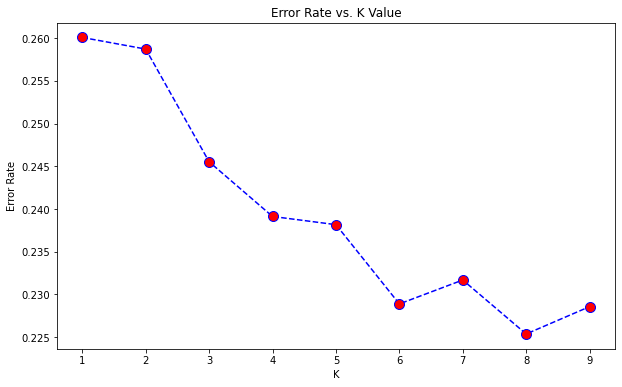

In [46]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


<AxesSubplot:>

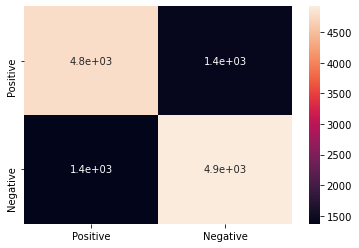

In [47]:

import seaborn as sns   
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)


In [ ]:
# K means 1-10 TF- IDF limited

In [48]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf2,y_train)
 pred_i = knn.predict(X_test_tf2)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.22536 at K = 8


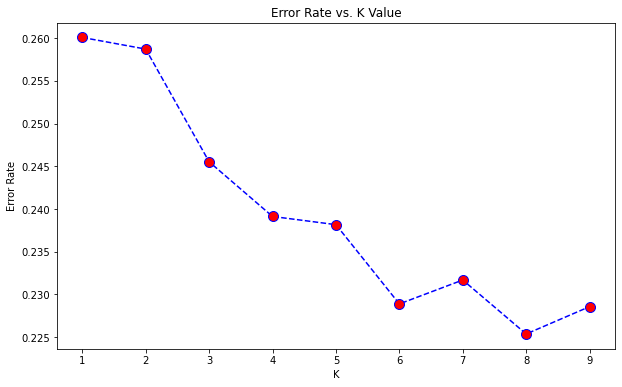

In [49]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


In [ ]:
# K means 1-10 CV 

In [ ]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_cv,y_train)
 pred_i = knn.predict(X_test_cv)
 error_rate.append(np.mean(pred_i != y_test))


In [ ]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate)+1))


# K means from 10 till 100 

In [32]:
error_rate = []
minR = 10 
maxR = 100
for i in range(10, 100, 10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.27783155856727976 at K = 8


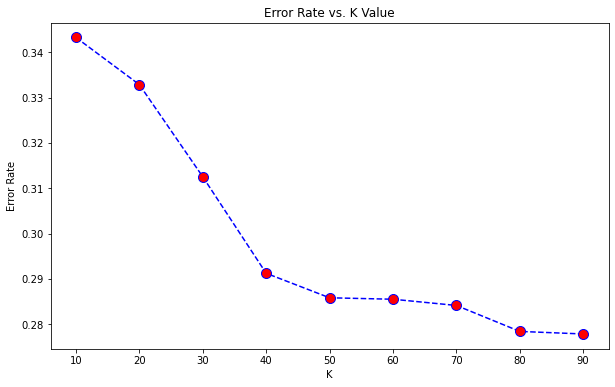

In [43]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 10)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate)))


# K Means from 100 to 1000

In [44]:
error_rate = []
minR = 100 
maxR = 10000
for i in range(100, 10000, 1000):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.27637947725072604 at K = 0


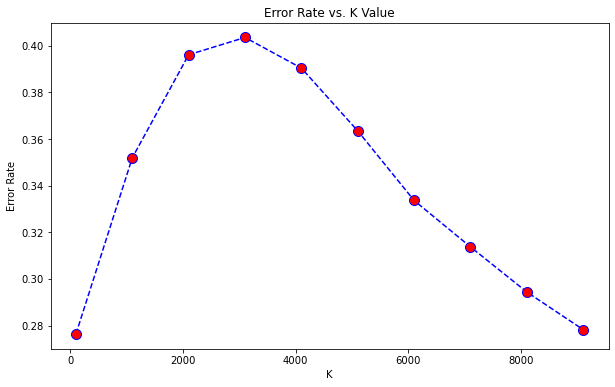

In [46]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 1000)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate)))


In [ ]:
# K Means from 3000 to 30000

In [ ]:
error_rate = []
minR = 3000 
maxR = 30000
for i in range(minR, maxR, 3000):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


In [ ]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 1000)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate)))


# Linear Support Vector Classification.

In [68]:
# LinearSVC + Tf IDF

In [23]:
from sklearn.svm import LinearSVC
# predict the new document from the testing dataset
from sklearn.metrics import plot_confusion_matrix    
    
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_tf, y_train)
y_pred = SVclassifier.predict(X_test_tf)

In [24]:
#result LinearSVC + Tf IDF

In [25]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

#import seaborn as sns   
#sns.heatmap(cm, annot=True)

accuracy:   0.888
              precision    recall  f1-score   support

    Positive       0.90      0.88      0.89      6227
    Negative       0.88      0.90      0.89      6169

    accuracy                           0.89     12396
   macro avg       0.89      0.89      0.89     12396
weighted avg       0.89      0.89      0.89     12396

confusion matrix:
[[5478  749]
 [ 635 5534]]
------------------------------


In [26]:
#LinearSVC + Tf IDF limited

In [27]:
   
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_tf2, y_train)
y_pred = SVclassifier.predict(X_test_tf2)

In [28]:
#result LinearSVC + Tf IDF limited

accuracy:   0.884
              precision    recall  f1-score   support

    Positive       0.89      0.88      0.88      6227
    Negative       0.88      0.89      0.88      6169

    accuracy                           0.88     12396
   macro avg       0.88      0.88      0.88     12396
weighted avg       0.88      0.88      0.88     12396

confusion matrix:
[[5455  772]
 [ 665 5504]]
------------------------------


<AxesSubplot:>

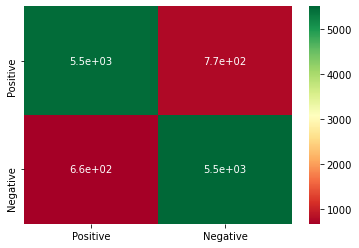

In [29]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)

In [ ]:
# LinearSVC + Count Vect

In [30]:
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_cv, y_train)
y_pred = SVclassifier.predict(X_test_cv)

C:\Users\danyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [29]:
#result LinearSVC + CV

In [31]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')
 

accuracy:   0.857
              precision    recall  f1-score   support

    Positive       0.86      0.85      0.86      6227
    Negative       0.85      0.86      0.86      6169

    accuracy                           0.86     12396
   macro avg       0.86      0.86      0.86     12396
weighted avg       0.86      0.86      0.86     12396

confusion matrix:
[[5305  922]
 [ 849 5320]]
------------------------------


#  SVM with the Radial Basis Function

In [38]:
from sklearn.svm import SVC
from sklearn import svm
rbf_svc = svm.SVC(kernel='rbf')

In [ ]:
rbf_svc.fit(X_train_tf, y_train)
y_pred = rbf_svc.predict(X_test_tf)

In [ ]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)

# Just SVC


In [51]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [52]:
# SVC + Tf IDF

In [ ]:
SVCclassifier = SVC()
     
SVCclassifier.fit(X_train_tf, y_train)
y_pred = SVCclassifier.predict(X_test_tf)


In [ ]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)